In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np

In [56]:
df = pd.read_csv('../data/raw/winequalityN.csv')

# White wine
df = df[df['type'] == 'white']
print(df.columns[1:-1])

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')


In [59]:
df.isnull().sum()

pandas.core.series.Series

In [62]:
# fill missing values with mean
for column in df.columns[1:-1]:
    df[column].fillna(df[column].mean(), inplace=True)

df.isnull().sum()

/var/folders/6w/gzx7pcf971s0_wsx_qrt5nqw0000gn/T/ipykernel_48731/2002010265.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True)


type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

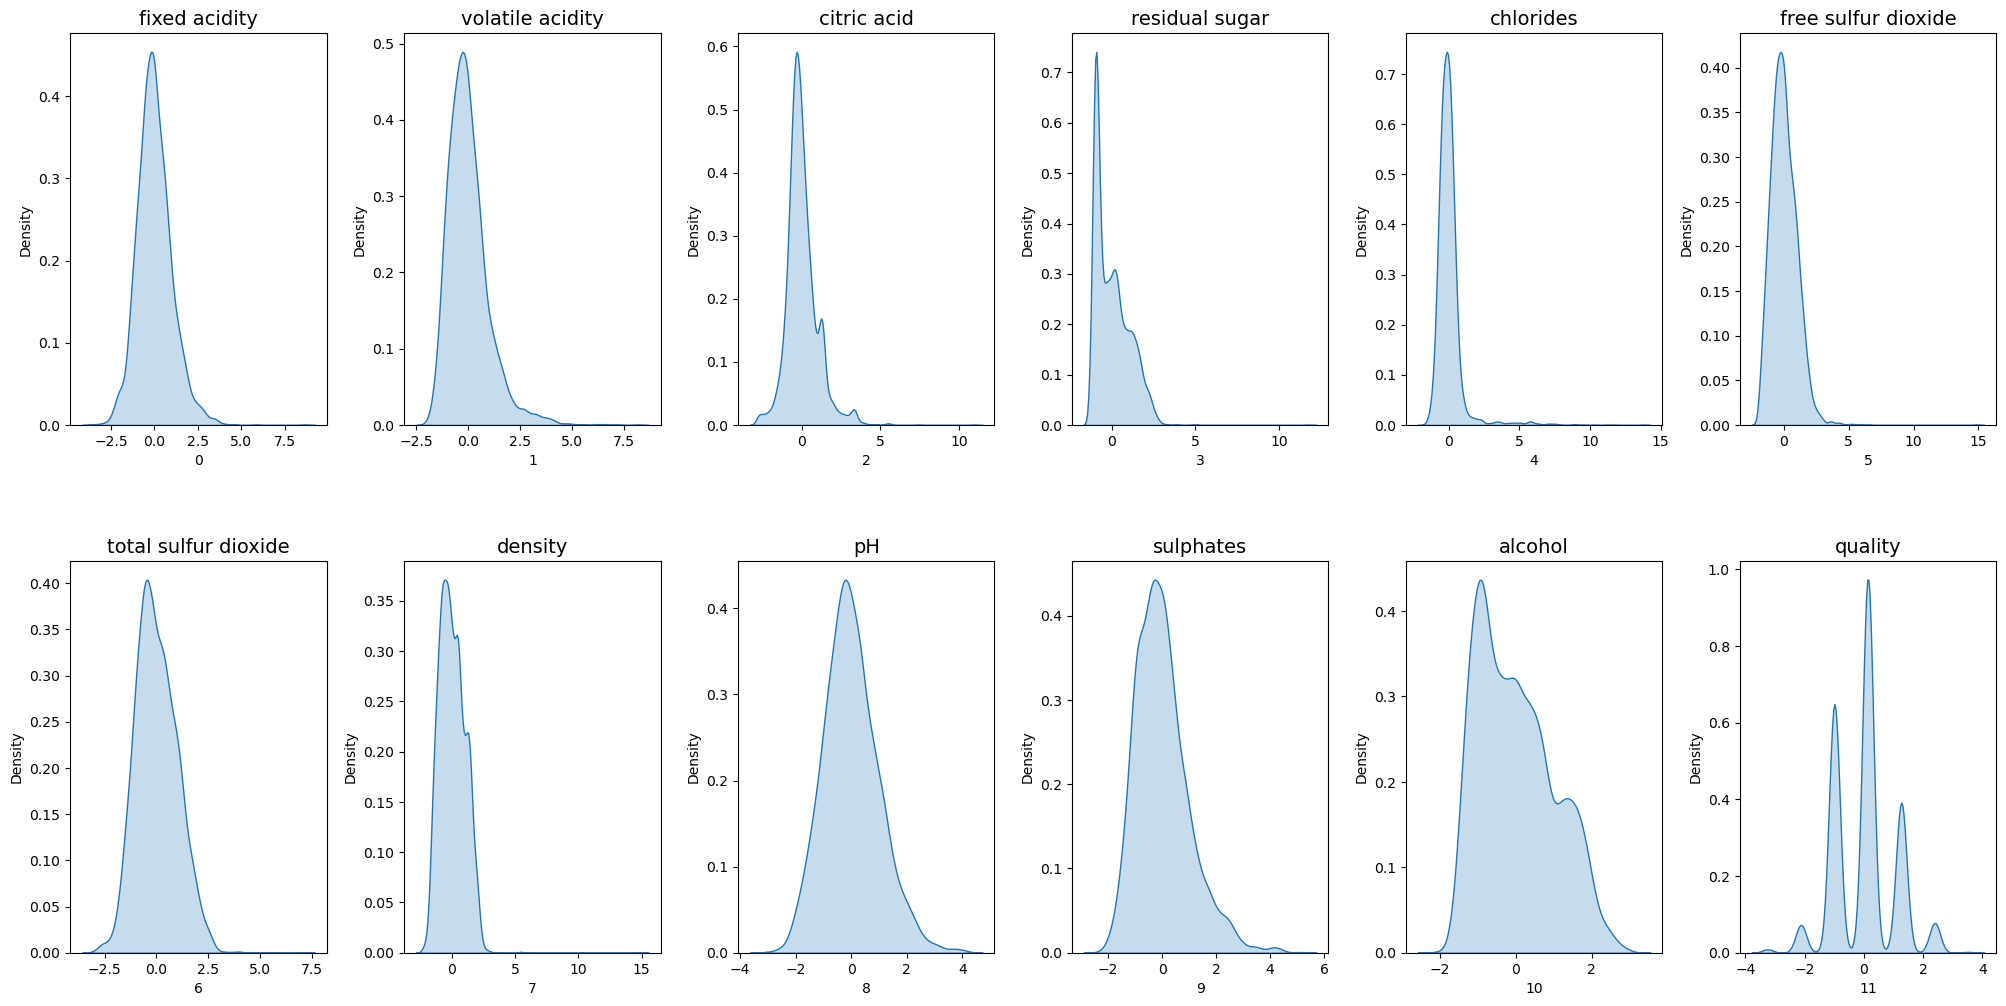

In [72]:
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
ax = ax.flatten()

# normalize the data of each column (feature)
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[df.columns[1:]]))

for i, col in enumerate(df_scaled.columns):
    if col == 'type':
        continue
    sns.kdeplot(df_scaled[col], fill=True, ax=ax[i])
    ax[i].set_title(df.columns[i+1], fontsize=14)
    
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)
# set title for graph
plt.show()